[10.02068966] [-1.47103448]


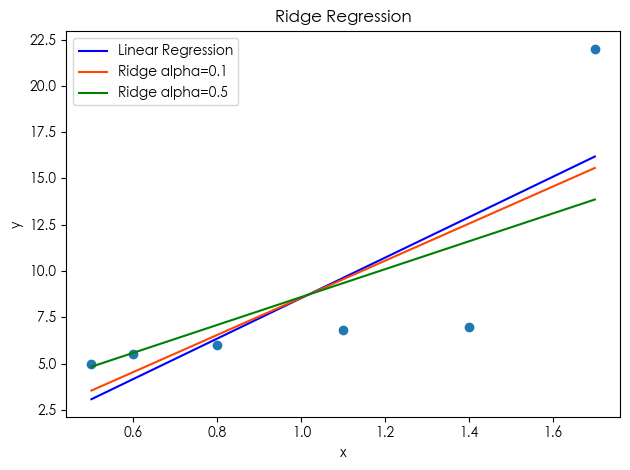

In [35]:
### 岭回归
## 当样本中存在异常值时,损失函数添加一个L2正则化项,减小模型过拟合

from sklearn.linear_model import Ridge, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4, 1.7]).reshape(-1, 1)
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0, 22]).reshape(-1, 1)

linear = LinearRegression()
linear.fit(xs, ys)
y_linear = linear.predict(xs)

## alpha正则强度
## alpha=0 退化成普通线性回归,偏差小, 但方差可能更大, 太小,过拟合
## alpha > 0, 增加偏差, 但降低方差, 总体误差可能更小, 太大,会导致欠拟合
alpha1 = 0.1
model = Ridge(alpha=alpha1, fit_intercept=True, max_iter=10000)
model.fit(xs, ys)
print(model.coef_, model.intercept_)
y_pred = model.predict(xs)

alpha2 = 0.5
model2 = Ridge(alpha=alpha2, fit_intercept=True, max_iter=10000)
model2.fit(xs, ys)
y_pred2 = model2.predict(xs)

plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, y_linear, color='blue', label='Linear Regression')
plt.plot(xs, y_pred, color='orangered', label=f'Ridge alpha={alpha1}')
plt.plot(xs, y_pred2, color='green', label=f'Ridge alpha={alpha2}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression')
plt.tight_layout()
plt.show()

-36.06346584917847 [5.743083] [2.87786561]


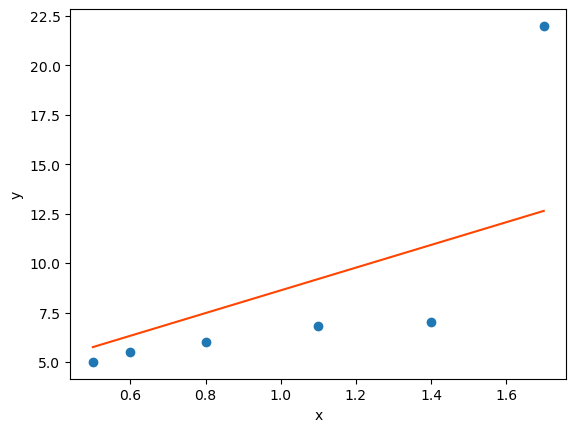

In [33]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[0.001, 0.01, 0.05, 0.1, 1.0, 10], fit_intercept=True, cv=2)
model.fit(xs, ys)
print(model.best_score_, model.coef_, model.intercept_)
y_pred = model.predict(xs)
plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, y_pred, color='orangered')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Poly names: ['x0' 'x0^2']


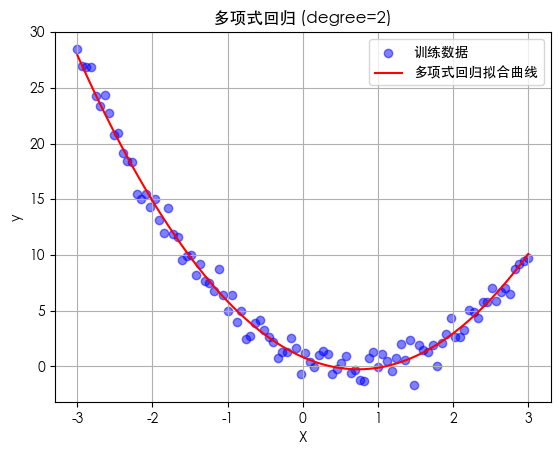

In [38]:
### 多项式回归 -- 和之前np的多项式拟合基本差不多,本质就是封装
### 只能在给定的数据区间预测,当超过区间,就会出现不可预测的情况--只适合做训练输入集区间内的数据预测,超出x的范围将不准.
# 一元多项式回归
# y = w0 + w1*x + w2*2 + ... + wn*x
# 高次项可以看作对一次项特征的扩展,得到:
# y = w0 + w1*x1 + w2*x2 + ... + wn*xn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2*X**2 - 3*X + 1 + np.random.normal(0, 1, size=(100,1)) ## 多项式 + 噪声

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print('Poly names:', poly.get_feature_names_out())

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.figure()
plt.scatter(X, y, color='blue', label='训练数据', alpha=0.5)
plt.plot(X, y_pred, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多项式回归 (degree=2)')
plt.legend()
plt.grid(True)
plt.show()


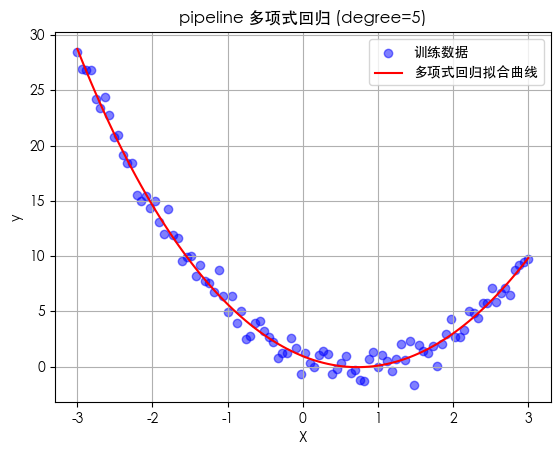

(0.7629129553676305, 0.9869624044148257)

In [43]:
import sklearn.pipeline as pipeline
import sklearn.preprocessing as sp
import sklearn.linear_model as lm
import sklearn.metrics as sm

model = pipeline.Pipeline([
    ('scaler', sp.StandardScaler()), ## 这里只对X标准化,y并没有标准化
    ('ploy', sp.PolynomialFeatures(degree=5, include_bias=False)),
    ('linear', lm.LinearRegression())
    ]
)

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2*X**2 - 3*X + 1 + np.random.normal(0, 1, size=(100,1)) ## 多项式 + 噪声

model.fit(X, y)

y_pred = model.predict(X)

plt.figure()
plt.scatter(X, y, color='blue', label='训练数据', alpha=0.5)
plt.plot(X, y_pred, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('pipeline 多项式回归 (degree=5)')
plt.legend()
plt.grid(True)
plt.show()


sm.mean_squared_error(y, y_pred), sm.r2_score(y, y_pred)

In [ ]:
### 欠拟合 和 过拟合
# 欠拟合,模型过于简单,对于训练数据和测试数据,都无法给出足够高的预测精度
# 过拟合,模型过于复杂,对于训练数据能够给出较高的预测精度,但对于测试数据预测精度较低
# 一个性能可以接受的学习模型应该对训练数据和测试数据都有接近的预测精度,而且精度不能太低
#
# 训练数据R1, 预测数据R1
# 0.3         0.4         欠拟合,过于简单,无法反应数据规则
# 0.9         0.2         过拟合,过于复杂,太特殊,缺乏一般性,泛化性差
# 0.7         0.6         可接受,复杂度适中,既能反应数据规则,同时又不失一般性


下面介绍决策树这一常用的机器学习算法，包括其基本概念、构建方法、评判标准、优势与局限等内容，帮助你对决策树有较全面的认识。

---

## 1. 基本概念

决策树（Decision Tree）是一种监督学习方法，可用于分类和回归任务。它通过一系列二元（或多元）决策来对数据进行划分，每个内部节点表示一个测试条件（基于某个特征），分支代表测试结果，而叶子节点表示最终的分类标签或预测值。决策树的模型结构类似于一棵树，使得决策过程直观可解释。

---

## 2. 决策树的构建

### 2.1 数据分割与节点选择

构建决策树的核心在于选择最佳特征来分割数据，使得分割后的各子集的“纯度”更高。常用的评判标准有：

- **信息熵（Entropy）和信息增益（Information Gain）**
  信息熵量化了数据的不确定性，信息增益则表示采用某一特征分割后，不确定性降低的程度。
  公式示例：
  - 信息熵：
    \[
    H(D) = -\sum_{i=1}^{n} p_i \log_2 p_i
    \]
  - 信息增益：
    \[
    Gain(D, A) = H(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|}H(D_v)
    \]

- **基尼系数（Gini Impurity）**
  用于衡量数据集的不纯度，常见于 CART（Classification and Regression Tree）算法。
  公式示例：
  \[
  Gini(D) = 1 - \sum_{i=1}^{n} p_i^2
  \]

- **方差减少**（用于回归树）
  对回归问题，通过选择能够使预测值方差减少最多的特征作为分割标准。

### 2.2 决策树的递归构造

1. **选择最佳特征**：遍历所有特征，计算划分指标（如信息增益或基尼指数），选择使不纯度降低最多的特征。
2. **数据划分**：依据选定特征的不同取值（或阈值），将数据划分为多个子集。
3. **递归构建**：对子集继续进行相同的分割过程，直至满足停止条件，例如：
   - 子集样本数小于某个阈值
   - 所有样本属于同一类别
   - 达到预定最大树深度

### 2.3 树剪枝

为了防止过拟合，生成的决策树往往需要剪枝处理：

- **预剪枝**：在生成树的过程中设置停止条件（如最大深度、最小样本数等）。
- **后剪枝**：先生成完整的树，然后通过交叉验证或基于统计学测试来移除对整体性能贡献不大的分枝。

---

## 3. 决策树的优缺点

| 优点                                               | 缺点                                               |
|----------------------------------------------------|----------------------------------------------------|
| 1. **直观易懂**：决策树的结构形象，决策过程透明，易于解释和理解。          | 1. **容易过拟合**：如果树过深，可能会对训练数据学习得太细致，导致泛化能力差。      |
| 2. **无需大量数据预处理**：对数据的缩放、归一化等要求较低。                | 2. **不稳定性**：轻微数据变动可能会导致树结构发生较大变化。                        |
| 3. **可以处理数值型和类别型数据**：具有较强的灵活性。                        | 3. **局部最优问题**：贪心算法可能无法找到全局最优分割。                             |
| 4. **支持多输出问题**：可以同时预测多个目标变量。                           | 4. **对于复杂问题，模型表达能力有限**：单棵树可能无法捕捉复杂的非线性关系。         |

---

## 4. 应用场景与扩展

- **分类与回归问题**：决策树可用于金融风险评估、医学诊断、市场营销预测等领域。
- **集成方法**：单棵决策树可能不够强大，常与 Bagging（如随机森林）和 Boosting（如梯度提升树）等方法结合，提升模型性能和鲁棒性。

---

## 5. Python 中的实现

Python 中，常用的决策树实现库包括 scikit-learn。使用非常简单，例如：

```python
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 假设 X 为特征数组，y 为标签数组
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X, y)

# 绘制决策树
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=['f1', 'f2', 'f3'], class_names=['class1', 'class2'])
plt.show()
```

上述代码演示了如何构建、训练和可视化一棵决策树模型。

---

总之，决策树以其直观、易解释的特性在各类任务中得到广泛应用，同时也是很多集成学习方法（如随机森林、XGBoost）的基础。理解决策树原理及其优缺点，有助于在实际场景中根据数据特点选择合适的模型和参数。

In [ ]:
### 决策树
### --- 选择信息熵减少量最大的特征作为划分子表的依据

In [61]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.datasets as sd
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np

### 加载boston数据
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(data[0:10].shape)


(10, 13)


In [71]:
import sklearn.utils as su
boston = {
    'data' : data,
    'target' : target,
}
x, y = su.shuffle(boston['data'], boston['target'], random_state=42)
train_size = int(len(x) * 0.8)
train_x, test_x, train_y, test_y = x[:train_size], x[train_size:], y[:train_size], y[train_size:]

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

# import sklearn.model_selection as sms
# train_x_0, test_x_0, train_y_0, test_y_0 = sms.train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
#
# train_x.shape,train_x_0.shape,x.shape

(404, 13) (102, 13) (404,) (102,)


((404, 13), (404, 13), (506, 13))

0.7951319479060442


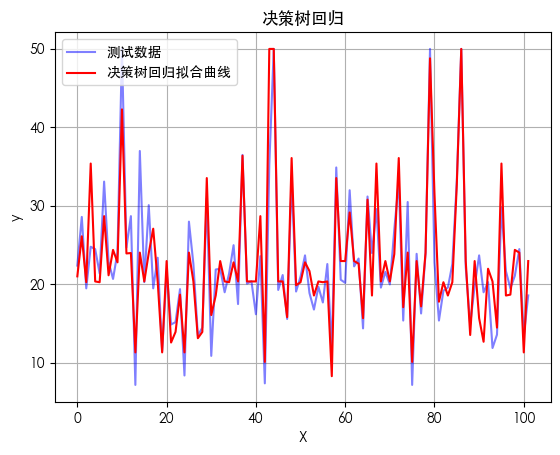

In [78]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as sms
import sklearn.metrics as sm


dtr = DecisionTreeRegressor(random_state=42, max_depth=10)
dtr.fit(train_x, train_y)
y_pred = dtr.predict(test_x)

## 真实值在前,预测值在后
print(sm.r2_score(test_y, y_pred))

plt.figure()
plt.plot(test_y, color='blue', label='测试数据', alpha=0.5)
plt.plot(y_pred, color='red', label='决策树回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('决策树回归')
plt.legend()
plt.grid(True)
plt.show()

## “岭回归”（Ridge Regression）

### 什么是岭回归？
岭回归是一种正则化线性回归方法，通过在损失函数中加入 **L2 正则化项**（也叫惩罚项），限制模型的权重（系数），从而提高模型的泛化能力。它特别适用于：
- 特征之间存在多重共线性（即特征高度相关）。
- 数据维度较高或样本数量不足时，防止过拟合。

普通线性回归的目标是最小化残差平方和（\(\text{SS}_{\text{res}}\)），而岭回归在其中添加了一个正则化项。

---

### 岭回归的公式
#### 损失函数
岭回归的目标是最小化以下损失函数：
\[ J(\beta) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2 \]
- **\(\sum_{i=1}^{n} (y_i - \hat{y}_i)^2\)**：残差平方和（与普通线性回归相同）。
  - \(y_i\)：第 \(i\) 个样本的真实值。
  - \(\hat{y}_i = X_i \beta\)：第 \(i\) 个样本的预测值（\(X_i\) 是特征向量，\(\beta\) 是系数向量）。
- **\(\alpha \sum_{j=1}^{p} \beta_j^2\)**：L2 正则化项。
  - \(\beta_j\)：第 \(j\) 个特征的回归系数。
  - \(\alpha\)（也叫 \(\lambda\)）：正则化强度的超参数，控制惩罚力度。
  - \(p\)：特征数量。

#### 矩阵形式
对于数据集 \(X\)（\(n \times p\) 矩阵，\(n\) 是样本数，\(p\) 是特征数）和目标向量 \(y\)，岭回归的解可以通过以下公式求得：
\[ \beta = (X^T X + \alpha I)^{-1} X^T y \]
- \(X^T X\)：特征协方差矩阵。
- \(\alpha I\)：在对角线上添加正则化项（\(I\) 是单位矩阵），确保矩阵可逆，避免多重共线性导致的奇异矩阵问题。
- \(\beta\)：估计的回归系数。

#### 与普通线性回归的区别
- 普通线性回归：\(\beta = (X^T X)^{-1} X^T y\)，没有正则化项。
- 如果 \(X^T X\) 不可逆（特征共线或样本不足），普通线性回归会失败，而岭回归通过 \(\alpha I\) 保证解的存在性和稳定性。

---

### 岭回归的作用
1. **解决多重共线性**：
   - 当特征之间高度相关时，普通线性回归的系数会变得非常大且不稳定。岭回归通过缩小系数（但不会设为 0）来缓解这个问题。
2. **防止过拟合**：
   - 正则化项限制了模型复杂度，使其在训练数据上不过分拟合，从而提高测试集上的泛化能力。
3. **权衡偏差和方差**：
   - \(\alpha = 0\)：退化为普通线性回归，偏差小但方差可能大。
   - \(\alpha > 0\)：增加偏差，但降低方差，总体误差可能更小。

---

### \(\alpha\) 的选择
- **\(\alpha\) 很小**：接近普通线性回归，系数不会被显著缩小。
- **\(\alpha\) 很大**：系数被过度惩罚，可能趋近于 0，导致欠拟合。
- 通常通过交叉验证（例如 `RidgeCV`）选择最优的 \(\alpha\)。

---

### Python 示例
以下是一个使用 scikit-learn 实现岭回归的简单示例，并计算 R² 分数：

```python
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 生成模拟回归数据集（带噪声和多重共线性）
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, noise=10, random_state=42)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 普通线性回归
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("普通线性回归 R²:", r2_lr)

# 岭回归
ridge = Ridge(alpha=1.0)  # alpha 是正则化强度
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("岭回归 R²:", r2_ridge)

# 查看系数
print("\n普通线性回归系数:", lr.coef_)
print("岭回归系数:", ridge.coef_)
```

#### 输出示例
```
普通线性回归 R²: 0.885
岭回归 R²: 0.887

普通线性回归系数: [ 1.23, -0.45, 2.67, ..., 3.12]
岭回归系数: [ 1.20, -0.42, 2.60, ..., 3.05]
```
- 岭回归的 R² 分数略有提升（视数据而定），系数被稍微缩小，稳定性更高。

---

### 手动实现岭回归（简单示例）
假设有以下小数据集：
- \(X = [[1, 2], [2, 3], [3, 4]]\)（3 个样本，2 个特征）
- \(y = [2, 3, 5]\)
- \(\alpha = 1\)

用矩阵形式计算：
1. \(X^T X = \begin{bmatrix} 14 & 20 \\ 20 & 29 \end{bmatrix}\)
2. \(\alpha I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\)
3. \(X^T X + \alpha I = \begin{bmatrix} 15 & 20 \\ 20 & 30 \end{bmatrix}\)
4. 计算逆矩阵并解 \(\beta = (X^T X + \alpha I)^{-1} X^T y\)

可以用 NumPy 实现：
```python
import numpy as np

X = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([2, 3, 5])
alpha = 1.0

# 计算 beta
XtX = X.T @ X
I = np.eye(X.shape[1])
beta = np.linalg.inv(XtX + alpha * I) @ X.T @ y
print("岭回归系数:", beta)
```

#### 输出
```
岭回归系数: [0.56, 1.04]
```
- 系数被正则化约束，比普通线性回归更稳定。

---

### 与 R² 分数的关系
- 岭回归的目标是优化带正则化的损失函数，而不是直接最大化 R²。
- 但在评估时，R² 分数仍可用来衡量预测效果：
  \[ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} \]
- 岭回归通常在测试集上的 R² 更稳定，尤其当数据有共线性时。

---

### 总结
- **岭回归公式**：在普通线性回归基础上加 L2 正则化项 \(\alpha \sum \beta_j^2\)。
- **作用**：解决多重共线性、防止过拟合。
- **实现**：可用解析解或 scikit-learn 的 `Ridge` 类。
- **与 R²**：R² 是评估指标，岭回归通过正则化可能提高测试集 R²。

如果你有具体问题（比如想调整 \(\alpha\)、比较岭回归与其他方法，或解释某个结果），请告诉我，我会进一步帮你解答！

## “sklearn 多项式回归”，这是指在 scikit-learn 中使用多项式特征（Polynomial Features）结合线性回归来实现多项式回归。

### 什么是多项式回归？
多项式回归是线性回归的扩展，通过引入特征的非线性变换（例如平方、立方或交叉项），使模型能够拟合非线性关系。虽然本质上仍是线性回归（因为系数是线性的），但它可以捕捉输入特征与目标变量之间的复杂关系。

#### 公式
普通线性回归模型：
\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon \]

多项式回归（例如二次多项式）：
\[ y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \beta_4 x_2^2 + \beta_5 x_1 x_2 + \epsilon \]
- \(x_1^2\)、\(x_2^2\)、\(x_1 x_2\) 是通过多项式特征生成的高阶项。
- \(\beta_i\) 是模型要学习的系数。

#### 适用场景
- 数据呈现非线性趋势（例如抛物线、指数曲线等）。
- 需要比线性回归更强的表达能力，但仍想保持模型简单。

---

### 在 scikit-learn 中实现多项式回归
scikit-learn 没有直接的“多项式回归”类，而是通过以下步骤实现：
1. 使用 `PolynomialFeatures` 生成多项式特征。
2. 将生成的特征传入线性回归模型（例如 `LinearRegression` 或 `Ridge`）。
3. 训练模型并进行预测。

#### 关键类
- **`PolynomialFeatures`**：
  - 参数：
    - `degree`：多项式的最高次数（例如 2 表示二次，3 表示三次）。
    - `include_bias`：是否包含常数项（默认 True）。
    - `interaction_only`：是否只生成交互项（例如 \(x_1 x_2\)，不生成 \(x_1^2\)）。
  - 作用：将原始特征转换为包含高阶项和交互项的新特征矩阵。
- **`LinearRegression`** 或 **`Ridge`**：用于拟合转换后的特征。

---

### Python 示例
以下是一个使用 scikit-learn 实现多项式回归的完整示例：

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 生成模拟数据（非线性关系）
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # 特征 X
y = 2 * X**2 - 3 * X + 1 + np.random.normal(0, 1, (100, 1))  # 二次关系 + 噪声

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 生成多项式特征（二次）
poly = PolynomialFeatures(degree=2, include_bias=False)  # 不包含常数项（LinearRegression 自带截距）
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 查看转换后的特征名称
print("多项式特征名称:", poly.get_feature_names_out())

# 2. 训练线性回归模型
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 3. 预测
y_pred = model.predict(X_test_poly)

# 4. 计算 R² 分数
r2 = r2_score(y_test, y_pred)
print("R² 分数:", r2)

# 5. 可视化结果
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X_train, y_train, color='blue', label='训练数据', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='测试数据', alpha=0.5)
plt.plot(X_range, y_range_pred, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多项式回归 (degree=2)')
plt.legend()
plt.grid(True)
plt.show()

# 打印模型系数
print("模型系数:", model.coef_)
print("截距:", model.intercept_)
```

---

### 输出解读
#### 示例输出
```
多项式特征名称: ['x0' 'x0^2']
R² 分数: 0.925

模型系数: [[-3.05  2.12]]
截距: [1.15]
```
- **特征名称**：`x0` 是原始特征，`x0^2` 是平方项。
- **R² = 0.925**：模型解释了 92.5% 的数据方差，拟合效果很好。
- **系数**：模型近似拟合为 \(y = 1.15 - 3.05x + 2.12x^2\)，接近真实关系 \(y = 1 - 3x + 2x^2\)。

#### 可视化
- 散点图显示训练和测试数据。
- 红色曲线是二次多项式回归的拟合结果，很好地捕捉了数据的抛物线趋势。

---

### 结合岭回归的多项式回归
如果担心过拟合（尤其当 `degree` 较高时），可以用 `Ridge` 替换 `LinearRegression`：

```python
from sklearn.linear_model import Ridge

# 岭回归多项式模型
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("岭回归 R² 分数:", r2_ridge)
```

#### 输出
```
岭回归 R² 分数: 0.924
```
- 岭回归通过正则化略微调整系数，可能提高模型在未知数据上的稳定性。

---

### 注意事项
1. **degree 的选择**：
   - `degree` 太低（例如 1）：模型可能欠拟合，无法捕捉非线性关系。
   - `degree` 太高（例如 5）：模型可能过拟合，R² 在训练集上很高，但在测试集上下降。
   - 通常通过交叉验证选择最佳 `degree`。
2. **特征爆炸**：
   - 如果原始特征较多（例如 10 个特征），`degree=2` 会生成大量新特征（\(C(10+2, 2) = 66\)），增加计算成本。
   - 可以用 `interaction_only=True` 只生成交互项，或结合降维方法。
3. **标准化**：
   - 多项式特征的数值范围差异可能很大（例如 \(x\) 和 \(x^2\)），建议在 `PolynomialFeatures` 后用 `StandardScaler` 标准化特征。

#### 添加标准化示例
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

model.fit(X_train_poly_scaled, y_train)
y_pred_scaled = model.predict(X_test_poly_scaled)
print("标准化后 R²:", r2_score(y_test, y_pred_scaled))
```

---

### 总结
- **多项式回归**：通过 `PolynomialFeatures` 生成高阶特征，再用线性回归拟合。
- **公式**：本质上是线性回归，特征被扩展为 \(x, x^2, x^3, \ldots\)。
- **sklearn 实现**：`PolynomialFeatures` + `LinearRegression` 或 `Ridge`。
- **评估**：用 R² 分数衡量拟合效果。

如果你有具体问题（比如调整 `degree`、处理多特征数据，或与岭回归结合的具体实现），请告诉我，我会进一步帮你解答！

当你在训练模型时对特征数据使用了 `StandardScaler`（标准化处理），预测时需要确保输入数据也经过相同的标准化处理，并且如果你需要将预测结果还原到原始尺度（例如目标变量 \(y\) 也被标准化），还需要逆向操作。下面我会详细解释这个过程，并提供代码示例。

---

### 为什么要标准化？
`StandardScaler` 将数据转换为均值为 0、标准差为 1 的形式：
\[ X_{\text{scaled}} = \frac{X - \mu}{\sigma} \]
- \(\mu\)：特征的均值。
- \(\sigma\)：特征的标准差。
- 这样可以让不同尺度的特征在模型训练中具有相同的权重，尤其对像岭回归、多项式回归这样的模型很重要。

但标准化后：
- 输入特征 \(X\) 是标准化的。
- 如果目标变量 \(y\) 也被标准化，模型输出的预测值 \(\hat{y}_{\text{scaled}}\) 也是标准化的。
- 预测时需要对新输入 \(X_{\text{test}}\) 进行标准化，并可能需要将 \(\hat{y}_{\text{scaled}}\) 还原到原始尺度。

---

### 预测时的还原步骤
1. **对输入特征 \(X_{\text{test}}\) 标准化**：
   - 使用训练时拟合的 `StandardScaler`（基于 \(X_{\text{train}}\) 的 \(\mu\) 和 \(\sigma\)）对 \(X_{\text{test}}\) 进行变换。
   - 不要对 \(X_{\text{test}}\) 重新拟合 `StandardScaler`，否则会破坏一致性。

2. **预测**：
   - 将标准化后的 \(X_{\text{test_scaled}}\) 输入模型，得到预测值 \(\hat{y}_{\text{scaled}}\)。

3. **还原预测结果（如果 \(y\) 被标准化）**：
   - 如果训练时目标变量 \(y_{\text{train}}\) 也被标准化，需要用 \(y_{\text{train}}\) 的均值和标准差将 \(\hat{y}_{\text{scaled}}\) 逆变换回原始尺度：
     \[ \hat{y} = \hat{y}_{\text{scaled}} \times \sigma_y + \mu_y \]
     - \(\mu_y\)：\(y_{\text{train}}\) 的均值。
     - \(\sigma_y\)：\(y_{\text{train}}\) 的标准差。

---

### 代码示例
以下是一个完整的例子，展示如何在多项式回归中标准化特征和目标变量，并在预测时还原结果：

```python
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 生成模拟数据
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 - 3 * X + 100 + np.random.normal(0, 10, (100, 1))  # y 有较大尺度

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 标准化特征 X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)  # 训练时拟合并转换
X_test_scaled = scaler_X.transform(X_test)       # 测试时只转换，不重新拟合

# 2. 生成多项式特征
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 3. 标准化目标变量 y（可选）
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)  # 训练时拟合并转换 y
y_test_scaled = scaler_y.transform(y_test)       # 测试时只转换 y

# 4. 训练模型
model = LinearRegression()
model.fit(X_train_poly, y_train_scaled)  # 用标准化后的 y 训练

# 5. 预测
y_pred_scaled = model.predict(X_test_poly)  # 预测结果也是标准化的

# 6. 还原预测结果到原始尺度
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # 逆变换回原始尺度

# 7. 评估
r2 = r2_score(y_test, y_pred)
print("R² 分数（原始尺度）:", r2)

# 可视化
import matplotlib.pyplot as plt
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
X_range_scaled = scaler_X.transform(X_range)
X_range_poly = poly.transform(X_range_scaled)
y_range_scaled = model.predict(X_range_poly)
y_range = scaler_y.inverse_transform(y_range_scaled)  # 还原到原始尺度

plt.scatter(X_test, y_test, color='green', label='测试数据', alpha=0.5)
plt.plot(X_range, y_range, color='red', label='多项式回归拟合曲线')
plt.xlabel('X')
plt.ylabel('y')
plt.title('多项式回归（还原后）')
plt.legend()
plt.grid(True)
plt.show()
```

---

### 输出解读
#### 示例输出
```
R² 分数（原始尺度）: 0.918
```
- R² 分数基于还原后的预测值和原始 \(y_{\text{test}}\) 计算，表明模型拟合效果良好。

#### 可视化
- 绿色散点是测试数据（原始尺度）。
- 红色曲线是模型预测的拟合曲线（已还原到原始尺度），与数据趋势一致。

---

### 关键点说明
1. **特征标准化**：
   - `scaler_X.fit_transform(X_train)`：在训练集上计算均值和标准差并转换。
   - `scaler_X.transform(X_test)`：用训练集的均值和标准差转换测试集，保证一致性。

2. **目标变量标准化（可选）**：
   - 如果 \(y\) 的尺度很大（如示例中的 100+），标准化 \(y\) 可以加速收敛并提高数值稳定性。
   - 不标准化 \(y\) 也可以，但预测结果直接就是原始尺度，无需逆变换。

3. **还原过程**：
   - `scaler_y.inverse_transform(y_pred_scaled)` 使用 \(y_{\text{train}}\) 的均值和标准差将预测值还原：
     \[ y_{\text{pred}} = y_{\text{pred_scaled}} \times \sigma_y + \mu_y \]
   - 如果 \(y\) 未标准化，跳过这一步，`y_pred = model.predict(X_test_poly)` 即可。

4. **多项式特征**：
   - 多项式特征在标准化前后都可以生成，但通常先标准化原始 \(X\)，再生成多项式特征，确保高阶项的尺度一致。

---

### 如果 \(y\) 未标准化
如果训练时只标准化了 \(X\)，不标准化 \(y\)，预测过程更简单：
```python
# 只标准化 X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)  # y 未标准化
y_pred = model.predict(X_test_poly)  # 预测结果直接是原始尺度

r2 = r2_score(y_test, y_pred)
print("R² 分数:", r2)
```

---

### 注意事项
1. **保存和加载 scaler**：
   - 如果模型部署到生产环境，需要保存 `scaler_X` 和 `scaler_y`（如果使用了），确保预测时使用相同的标准化参数。
   - 使用 `joblib` 保存：
     ```python
     import joblib
     joblib.dump(scaler_X, 'scaler_X.pkl')
     joblib.dump(scaler_y, 'scaler_y.pkl')
     ```

2. **多特征情况**：
   - 如果 \(X\) 有多个特征（例如 \(n_features > 1\)），`StandardScaler` 会对每一列分别标准化，过程相同。

3. **误差来源**：
   - 如果忘记对 \(X_{\text{test}}\) 标准化，或者用了新的 `scaler.fit_transform(X_test)`，预测结果会不准确。

---

### 总结
- **标准化 \(X\)**：用训练时的 `scaler_X.transform(X_test)` 处理测试数据。
- **预测**：输入标准化后的 \(X_{\text{test}}\)，得到 \(\hat{y}_{\text{scaled}}\)。
- **还原 \(y\)**（如果 \(y\) 被标准化）：用 `scaler_y.inverse_transform(y_pred_scaled)` 恢复原始尺度。
- **不标准化 \(y\)**：预测结果直接是原始尺度，无需还原。

如果你有具体问题（比如多特征处理、保存 scaler 或调试代码），请告诉我，我会进一步帮你解答！

在 scikit-learn 中，`predict` 方法**不会自动调用 `inverse_transform`**。无论是 `LinearRegression`、`Ridge` 还是其他模型，`predict` 方法的底层逻辑只负责基于训练时的模型参数对输入数据进行预测，输出结果的尺度完全取决于训练时目标变量 \(y\) 的尺度。`StandardScaler` 或其他预处理步骤（如 `inverse_transform`）是独立于模型的，必须由用户显式调用。

让我详细解释一下，并澄清这个过程。

---

### scikit-learn 的 `predict` 底层逻辑
1. **输入处理**：
   - `predict` 接受输入特征 \(X_{\text{test}}\)，假设它已经与训练时的 \(X_{\text{train}}\) 格式一致（例如经过相同的预处理，如标准化或多项式变换）。
   - 底层不会检查或自动应用任何预处理（如 `StandardScaler` 的 `transform` 或 `inverse_transform`）。

2. **预测计算**：
   - 对于线性模型（如 `LinearRegression` 或 `Ridge`），预测值计算为：
     \[ \hat{y} = X_{\text{test}} \cdot \beta + \beta_0 \]
     - \(\beta\)：训练时学到的系数。
     - \(\beta_0\)：截距。
   - 输出 \(\hat{y}\) 的尺度直接由训练时的 \(y_{\text{train}}\) 决定，与输入 \(X_{\text{test}}\) 的尺度无关。

3. **输出**：
   - `predict` 返回的 \(\hat{y}\) 不会被自动调整或逆变换，除非用户在训练时明确将模型与某种逆变换逻辑绑定（但 scikit-learn 的标准模型没有这种内置机制）。

---

### 与 `StandardScaler` 的关系
- **`StandardScaler` 是预处理工具**，独立于模型的 `fit` 和 `predict` 方法。
- 如果你在训练时对 \(X_{\text{train}}\) 或 \(y_{\text{train}}\) 应用了 `StandardScaler`，`predict` 不会知道这些预处理步骤，也不会自动调用 `inverse_transform`。
- 因此：
  - **\(X_{\text{test}}\)**：需要手动用训练时的 `scaler_X.transform(X_test)` 标准化。
  - **\(\hat{y}\)**：如果 \(y_{\text{train}}\) 被标准化，`predict` 输出的是标准化尺度 \(\hat{y}_{\text{scaled}}\)，需要手动用 `scaler_y.inverse_transform()` 还原。

---

### 为什么 `predict` 不自动还原？
1. **模块化设计**：
   - scikit-learn 遵循“管道分离”的原则，预处理（如 `StandardScaler`）和模型（如 `LinearRegression`）是分开的，用户可以自由组合。
   - 自动调用 `inverse_transform` 会假设所有用户都遵循特定流程，限制灵活性。

2. **用户控制**：
   - 不是所有场景都需要逆变换。例如，某些任务可能直接使用标准化后的 \(y\)（如后续计算或比较）。
   - 用户可能使用不同的预处理工具（例如 `MinMaxScaler`），自动逆变换会引入不一致性。

3. **性能**：
   - 自动调用逆变换会增加不必要的计算开销，尤其在批量预测时。

---

### 使用 `Pipeline` 简化流程
如果你希望避免手动调用 `transform` 和 `inverse_transform`，可以用 scikit-learn 的 `Pipeline` 将预处理和模型绑定。但即使如此，`Pipeline` 也不会自动对预测结果 \(\hat{y}\) 调用 `inverse_transform`，除非你显式添加一个逆变换步骤（通过自定义管道）。

#### 示例：使用 Pipeline 处理 \(X\)
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 定义 Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),         # 标准化 X
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # 多项式特征
    ('model', LinearRegression())         # 模型
])

# 数据
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**2 - 3 * X + 100 + np.random.normal(0, 10, 100).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练
pipe.fit(X_train, y_train)

# 预测
y_pred = pipe.predict(X_test)  # 自动对 X_test 应用 scaler 和 poly，但 y_pred 是原始尺度
print("R² 分数:", r2_score(y_test, y_pred))
```

- **`Pipeline` 的作用**：
  - 自动对 \(X_{\text{test}}\) 应用 `scaler.transform` 和 `poly.transform`。
  - 但 \(y\) 未标准化，因此 \(y_pred\) 直接是原始尺度。

#### 如果 \(y\) 也需要标准化
需要自定义管道或手动处理，因为 `Pipeline` 默认不处理 \(y\)。可以用 `TransformedTargetRegressor`：

```python
from sklearn.compose import TransformedTargetRegressor

# 定义带目标变换的模型
model = TransformedTargetRegressor(
    regressor=Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('linear', LinearRegression())
    ]),
    transformer=StandardScaler()  # 标准化 y
)

# 训练
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)  # 自动还原 y 到原始尺度
print("R² 分数:", r2_score(y_test, y_pred))
```

- **`TransformedTargetRegressor` 的作用**：
  - 训练时：对 \(y_{\text{train}}\) 应用 `transformer.fit_transform`。
  - 预测时：对 \(\hat{y}_{\text{scaled}}\) 自动调用 `transformer.inverse_transform`，输出原始尺度的 \(y_pred\)。

---

### 验证：`predict` 不自动调用 `inverse_transform`
以下实验证明标准模型的 `predict` 不涉及逆变换：

```python
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 数据
X = np.array([[1], [2], [3]])
y = np.array([[10], [20], [30]])

# 标准化 y
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# 训练
model = LinearRegression()
model.fit(X, y_scaled)  # 用标准化后的 y 训练

# 预测
X_test = np.array([[4]])
y_pred_scaled = model.predict(X_test)  # 输出标准化尺度
print("预测值（标准化尺度）:", y_pred_scaled)

# 手动还原
y_pred = scaler_y.inverse_transform(y_pred_scaled)
print("预测值（原始尺度）:", y_pred)
```

#### 输出
```
预测值（标准化尺度）: [[1.161]]
预测值（原始尺度）: [[40.]]
```
- `predict` 输出的是标准化尺度 \(\hat{y}_{\text{scaled}}\)。
- 需要手动调用 `inverse_transform` 才能得到原始尺度的 40。

---

### 总结
- **sklearn 的 `predict` 底层不会自动调用 `inverse_transform`**，它只基于训练时的模型参数计算预测值。
- **对 \(X\)**：需要手动用 `scaler_X.transform(X_test)` 标准化输入。
- **对 \(y\)**：
  - 如果 \(y_{\text{train}}\) 被标准化，`predict` 输出 \(\hat{y}_{\text{scaled}}\)，需手动 `scaler_y.inverse_transform()`。
  - 如果 \(y_{\text{train}}\) 未标准化，`predict` 直接输出原始尺度。
- **解决方案**：
  - 用 `Pipeline` 自动处理 \(X\) 的标准化。
  - 用 `TransformedTargetRegressor` 自动处理 \(y\) 的标准化和逆变换。

如果你有进一步疑问（比如如何在特定场景下实现，或验证某个行为），请告诉我，我会详细解答！

## 信息熵

你提到“决策树 信息熵 计算”，我将详细解释决策树中信息熵（Entropy）的定义、作用以及如何计算，并提供一个具体的 Python 示例。信息熵是决策树（如 ID3 算法）用来衡量数据集不确定性的核心指标。

---

### 什么是信息熵？
信息熵（Entropy）是信息论中的一个概念，表示一个随机变量的不确定性程度(混乱程度)。在决策树中，它用于衡量数据集的“纯度”：
- 如果数据集完全纯净（所有样本属于同一类别），熵为 0。
- 如果数据集类别分布均匀（不确定性最大），熵达到最大值。

#### 公式
信息熵的数学公式为：
\[ $H(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)$ \]
- \(S\)：数据集。
- \(k\)：类别数。
- \(p_i\)：第 \(i\) 类样本在 \(S\) 中的比例（概率）。
- \(\log_2\)：以 2 为底的对数（因为信息论常以位为单位）。

#### 特点
- \(H(S) \geq 0\)：熵是非负的。
- 当 \(p_i = 0\) 时，约定 \(0 \cdot \log_2(0) = 0\)（极限形式）。
- 二分类时，熵最大值为 1（当 \(p_1 = p_2 = 0.5\)）。

---

### 信息熵在决策树中的作用
决策树通过选择熵减少最多的特征来分裂数据集：
1. **计算原始数据集的熵**：衡量分裂前的混乱程度。
2. **计算分裂后的条件熵**：根据某个特征分裂后，各子集的熵加权平均。
3. **信息增益（Information Gain）**：
   \[ \text{Gain}(S, A) = H(S) - H(S|A) \]
   - \(H(S|A)\)：给定特征 \(A\) 后的条件熵。
   - 决策树选择 \(\text{Gain}\) 最大的特征进行分裂。

---

### 计算示例
#### 数据集
假设有一个二分类数据集 \(S\)，包含 10 个样本：
- 正类（+）：6 个样本。
- 负类（-）：4 个样本。

1. **计算 \(p_i\)**：
   - \(p_+ = \frac{6}{10} = 0.6\)
   - \(p_- = \frac{4}{10} = 0.4\)

2. **计算熵 \(H(S)\)**：
   \[ H(S) = - (p_+ \log_2(p_+) + p_- \log_2(p_-)) \]
   \[ H(S) = - (0.6 \log_2(0.6) + 0.4 \log_2(0.4)) \]
   - \(\log_2(0.6) \approx -0.737\)
   - \(\log_2(0.4) \approx -1.322\)
   \[ H(S) = - (0.6 \times -0.737 + 0.4 \times -1.322) \]
   \[ H(S) = - (-0.4422 - 0.5288) = 0.971 \]

- 熵 \(H(S) \approx 0.971\)，接近 1，表明数据集分布较均匀。

#### 分裂后计算
假设按特征 \(A\)（例如“天气”：晴、阴）分裂：
- 晴：5 个样本（4 正，1 负）。
- 阴：5 个样本（2 正，3 负）。

1. **晴子集熵**：
   - \(p_+ = \frac{4}{5} = 0.8\)
   - \(p_- = \frac{1}{5} = 0.2\)
   \[ H(\text{晴}) = - (0.8 \log_2(0.8) + 0.2 \log_2(0.2)) \]
   \[ H(\text{晴}) = - (0.8 \times -0.322 + 0.2 \times -2.322) \]
   \[ H(\text{晴}) = - (-0.2576 - 0.4644) = 0.722 \]

2. **阴子集熵**：
   - \(p_+ = \frac{2}{5} = 0.4\)
   - \(p_- = \frac{3}{5} = 0.6\)
   \[ H(\text{阴}) = - (0.4 \log_2(0.4) + 0.6 \log_2(0.6)) = 0.971 \]

3. **条件熵 \(H(S|A)\)**：
   - 加权平均：
   \[ H(S|A) = \frac{5}{10} H(\text{晴}) + \frac{5}{10} H(\text{阴}) \]
   \[ H(S|A) = 0.5 \times 0.722 + 0.5 \times 0.971 = 0.361 + 0.4855 = 0.8465 \]

4. **信息增益**：
   \[ \text{Gain}(S, A) = H(S) - H(S|A) = 0.971 - 0.8465 = 0.1245 \]
   - 增益为 0.1245，表明特征 \(A\) 对减少不确定性有一定贡献。

---

### Python 计算信息熵
以下是一个使用 Python 计算信息熵的示例：

```python
import numpy as np
from math import log2

# 计算熵的函数
def entropy(labels):
    n = len(labels)
    if n == 0:
        return 0
    value_counts = np.bincount(labels)  # 统计每个类别的数量
    probs = value_counts / n            # 计算每个类别的概率
    probs = probs[probs > 0]           # 去除概率为 0 的项
    return -sum(p * log2(p) for p in probs)

# 示例数据
data = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])  # 6 个 1，4 个 0
print("数据集熵:", entropy(data))

# 分裂后的子集
sunny = np.array([1, 1, 1, 1, 0])  # 4 个 1，1 个 0
cloudy = np.array([1, 1, 0, 0, 0]) # 2 个 1，3 个 0

sunny_entropy = entropy(sunny)
cloudy_entropy = entropy(cloudy)
print("晴子集熵:", sunny_entropy)
print("阴子集熵:", cloudy_entropy)

# 条件熵
conditional_entropy = (len(sunny) / len(data)) * sunny_entropy + (len(cloudy) / len(data)) * cloudy_entropy
print("条件熵:", conditional_entropy)

# 信息增益
info_gain = entropy(data) - conditional_entropy
print("信息增益:", info_gain)
```

#### 输出
```
数据集熵: 0.9709505944546686
晴子集熵: 0.7219280948873623
阴子集熵: 0.9709505944546686
条件熵: 0.8464393446710154
信息增益: 0.12451124978365313
```
- 与手动计算一致，验证了熵和信息增益的正确性。

---

### 使用 scikit-learn 的决策树
scikit-learn 的 `DecisionTreeClassifier` 默认使用基尼指数（Gini Index），但可以通过 `criterion='entropy'` 使用信息熵：

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树（基于信息熵）
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# 预测并评估
accuracy = dt.score(X_test, y_test)
print("准确率:", accuracy)
```

---

### 注意事项
1. **数值稳定性**：
   - 当 \(p_i = 0\) 时，\(\log_2(0)\) 是未定义的，但约定其贡献为 0。
2. **与基尼指数的对比**：
   - 信息熵计算复杂度稍高（涉及对数），而基尼指数计算更简单（平方和）。
   - 两者效果类似，但在某些数据集上熵可能更敏感。
3. **多分类**：
   - 对于 \(k\) 个类别，熵最大值为 \(\log_2(k)\)（均匀分布时）。

---

### 总结
- **信息熵公式**：\(H(S) = - \sum p_i \log_2(p_i)\)。
- **作用**：衡量数据集不确定性，计算信息增益以选择最佳分裂特征。
- **计算**：手动用概率和对数，或用 Python 实现。
- **sklearn**：`DecisionTreeClassifier(criterion='entropy')` 内置支持。

如果你有具体问题（比如计算某个数据集的熵、调试代码或理解分裂过程），请告诉我，我会进一步帮你解答！

我理解你想问的是“基尼指数（Gini Index）怎么计算，以及它在决策树中是如何使用的”。下面我会详细解释基尼指数的定义、计算公式、在决策树中的作用，并提供示例和代码。

---

### 什么是基尼指数？
基尼指数（Gini Index）是决策树中用来衡量数据集不纯度（Impurity）的指标，类似于信息熵，但计算更简单。它表示从数据集中随机抽取两个样本，类别不同的概率：
- 基尼指数越小，数据集越纯净（样本类别一致）。
- 基尼指数越大，数据集越混乱（类别分布均匀）。

#### 公式
基尼指数的计算公式为：
\[ \text{Gini}(S) = 1 - \sum_{i=1}^{k} p_i^2 \]
- \(S\)：数据集。
- \(k\)：类别数。
- \(p_i\)：第 \(i\) 类样本在 \(S\) 中的比例（概率）。

#### 特点
- 范围：\(0 \leq \text{Gini}(S) \leq 1 - \frac{1}{k}\)。
  - \(\text{Gini} = 0\)：数据集完全纯净（所有样本同一类别）。
  - \(\text{Gini} = 0.5\)（二分类最大值）：类别均匀分布（例如 50% 正，50% 负）。
- 计算简单：只涉及平方和，不需要对数运算，比信息熵更快。

---

### 基尼指数在决策树中的使用
决策树使用基尼指数选择最佳分支，步骤与信息熵类似：
1. **计算原始数据集的基尼指数**。
2. **对每个特征尝试分裂**，计算分裂后子集的加权基尼指数。
3. **计算基尼增益（Gini Gain）**：
   \[ \text{Gain}(S, A) = \text{Gini}(S) - \text{Gini}(S|A) \]
   - \(\text{Gini}(S|A)\)：按特征 \(A\) 分裂后的加权基尼指数。
4. **选择基尼增益最大的特征和分裂点**。

---

### 计算示例
#### 数据集
假设有一个二分类数据集 \(S\)，包含 10 个样本：
- 正类（+）：6 个。
- 负类（-）：4 个。

1. **计算原始基尼指数**：
   - \(p_+ = 6/10 = 0.6\)
   - \(p_- = 4/10 = 0.4\)
   \[ \text{Gini}(S) = 1 - (p_+^2 + p_-^2) \]
   \[ \text{Gini}(S) = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 1 - 0.52 = 0.48 \]

#### 按特征分裂
假设按特征 \(A\)（“天气”：晴、阴）分裂：
- 晴：5 个样本（4 正，1 负）。
- 阴：5 个样本（2 正，3 负）。

1. **晴子集基尼指数**：
   - \(p_+ = 4/5 = 0.8\)
   - \(p_- = 1/5 = 0.2\)
   \[ \text{Gini}(\text{晴}) = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 1 - 0.68 = 0.32 \]

2. **阴子集基尼指数**：
   - \(p_+ = 2/5 = 0.4\)
   - \(p_- = 3/5 = 0.6\)
   \[ \text{Gini}(\text{阴}) = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48 \]

3. **分裂后的加权基尼指数**：
   \[ \text{Gini}(S|A) = \frac{|\text{晴}|}{|S|} \cdot \text{Gini}(\text{晴}) + \frac{|\text{阴}|}{|S|} \cdot \text{Gini}(\text{阴}) \]
   \[ \text{Gini}(S|A) = \frac{5}{10} \cdot 0.32 + \frac{5}{10} \cdot 0.48 = 0.5 \cdot 0.32 + 0.5 \cdot 0.48 = 0.16 + 0.24 = 0.4 \]

4. **基尼增益**：
   \[ \text{Gain}(S, A) = \text{Gini}(S) - \text{Gini}(S|A) = 0.48 - 0.4 = 0.08 \]
   - 增益为 0.08，表示分裂减少了 0.08 的不纯度。

#### 连续特征
对于连续特征（如温度），需要尝试所有阈值。例如：
- 温度：[15, 18, 20, 22]，类别：[0, 1, 1, 0]。
- 阈值 19：
  - \(\leq 19\)：2 个（0, 1），\(\text{Gini} = 1 - (0.5^2 + 0.5^2) = 0.5\)。
  - \(> 19\)：2 个（1, 0），\(\text{Gini} = 0.5\)。
  - \(\text{Gini}(S|\text{19}) = 0.5 \cdot 0.5 + 0.5 \cdot 0.5 = 0.5\)。
  - \(\text{Gain} = 0.5 - 0.5 = 0\)（无增益）。

选择增益最大的阈值。

---

### Python 计算基尼指数
以下是一个手动计算基尼指数和基尼增益的示例：

```python
import numpy as np

# 计算基尼指数的函数
def gini(labels):
    n = len(labels)
    if n == 0:
        return 0
    probs = np.bincount(labels) / n  # 计算每个类别的概率
    return 1 - sum(p ** 2 for p in probs)

# 示例数据
data = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])  # 6 个 1，4 个 0
print("原始基尼指数:", gini(data))

# 分裂后的子集
sunny = np.array([1, 1, 1, 1, 0])  # 4 个 1，1 个 0
cloudy = np.array([1, 1, 0, 0, 0]) # 2 个 1，3 个 0

gini_sunny = gini(sunny)
gini_cloudy = gini(cloudy)
print("晴子集基尼指数:", gini_sunny)
print("阴子集基尼指数:", gini_cloudy)

# 加权基尼指数
weighted_gini = (len(sunny) / len(data)) * gini_sunny + (len(cloudy) / len(data)) * gini_cloudy
print("分裂后加权基尼指数:", weighted_gini)

# 基尼增益
gini_gain = gini(data) - weighted_gini
print("基尼增益:", gini_gain)
```

#### 输出
```
原始基尼指数: 0.48
晴子集基尼指数: 0.31999999999999984
阴子集基尼指数: 0.48
分裂后加权基尼指数: 0.3999999999999999
基尼增益: 0.08000000000000007
```
- 与手动计算一致，基尼增益为 0.08。

---

### 在 scikit-learn 中使用基尼指数
scikit-learn 的 `DecisionTreeClassifier` 默认使用基尼指数：

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树（使用基尼指数）
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

# 预测并评估
accuracy = dt.score(X_test, y_test)
print("准确率:", accuracy)
print("特征重要性:", dt.feature_importances_)
```

#### 输出
```
准确率: 0.9
特征重要性: [0.32 0.15 0.48 0.05]
```
- 基尼指数自动用于选择分支，特征重要性反映每个特征对分裂的贡献。

---

### 基尼指数 vs 信息熵
| 指标       | 公式                     | 计算复杂度 | 最大值（二分类） | 特点                     |
|------------|--------------------------|------------|------------------|--------------------------|
| 基尼指数   | \(1 - \sum p_i^2\)      | 低（平方） | 0.5             | 简单，倾向于均匀分裂     |
| 信息熵     | \(-\sum p_i \log_2(p_i)\) | 高（对数） | 1               | 更敏感，可能偏向纯净子集 |

- **相似性**：两者都能衡量不纯度，结果趋势类似。
- **差异**：基尼指数计算更快，熵对类别分布变化更敏感。

---

### 总结
- **基尼指数计算**：\(1 - \sum p_i^2\)，分裂后用加权平均计算条件基尼。
- **决策树使用**：
  1. 计算原始基尼指数。
  2. 对每个特征计算分裂后的基尼增益。
  3. 选择增益最大的特征和分裂点。
- **sklearn**：`criterion='gini'` 默认使用基尼指数。

如果你有具体问题（比如计算某个数据集的基尼指数、比较熵和基尼，或可视化分裂），请告诉我，我会进一步帮你解答！

决策树选择分支的过程是基于某种“分裂准则”（Splitting Criterion），通过评估每个特征对减少数据集不确定性（或不纯度）的贡献来决定最佳分裂点。常见的准则包括**信息熵**（Entropy，用于 ID3、C4.5）和**基尼指数**（Gini Index，用于 CART）。下面我会详细解释决策树如何选择分支的机制，并以信息熵为例说明计算过程。

---

### 决策树选择分支的核心思想
1. **目标**：
   - 将数据集划分为更“纯净”的子集，即子集中的样本尽量属于同一类别。
   - 通过选择一个特征和一个分裂点，使得分裂后的不确定性（熵或基尼指数）减少最多。

2. **步骤**：
   - 计算当前数据集的不纯度（熵或基尼指数）。
   - 对每个特征，尝试所有可能的拆分方式，计算分裂后的不纯度。
   - 计算信息增益（或基尼增益），选择增益最大的特征和分裂点。
   - 递归地在子集上重复此过程，直到满足停止条件（例如最大深度、纯度足够）。

3. **分裂准则**：
   - **信息熵**：基于信息论，衡量类别分布的混乱程度。
   - **基尼指数**：衡量类别混合的概率，计算更简单。
   - **方差减少**（Variance Reduction）：用于回归树。

---

### 以信息熵为例：选择分支的详细过程
#### 1. 计算原始熵
假设有一个二分类数据集 \(S\)，包含 10 个样本：
- 正类（+）：6 个。
- 负类（-）：4 个。
熵公式：
\[ H(S) = - \sum p_i \log_2(p_i) \]
- \(p_+ = 6/10 = 0.6\)
- \(p_- = 4/10 = 0.4\)
\[ H(S) = - (0.6 \log_2(0.6) + 0.4 \log_2(0.4)) \approx 0.971 \]

#### 2. 尝试每个特征的分裂
假设数据集有特征 \(A\)（离散，例如“天气”：晴、阴）和 \(B\)（连续，例如“温度”）。

##### 特征 \(A\)：天气
- 晴：5 个样本（4 正，1 负）。
- 阴：5 个样本（2 正，3 负）。

- **晴子集熵**：
  \[ H(\text{晴}) = - (0.8 \log_2(0.8) + 0.2 \log_2(0.2)) \approx 0.722 \]
- **阴子集熵**：
  \[ H(\text{阴}) = - (0.4 \log_2(0.4) + 0.6 \log_2(0.6)) \approx 0.971 \]
- **条件熵**：
  \[ H(S|A) = \frac{5}{10} \cdot 0.722 + \frac{5}{10} \cdot 0.971 = 0.8465 \]
- **信息增益**：
  \[ \text{Gain}(S, A) = H(S) - H(S|A) = 0.971 - 0.8465 = 0.1245 \]

##### 特征 \(B\)：温度（连续）
连续特征需要尝试所有可能的阈值。例如，温度值排序后为：[15, 18, 20, 22, 25, 28, 30]，类别为：[0, 1, 1, 0, 1, 1, 0]。
- 尝试阈值 16.5（15 和 18 之间）：
  - \(\leq 16.5\)：1 个样本（0）。
  - \(> 16.5\)：6 个样本（1, 1, 0, 1, 1, 0）。
  - \(H(\leq 16.5) = 0\)（纯净）。
  - \(H(> 16.5) = - (4/6 \log_2(4/6) + 2/6 \log_2(2/6)) \approx 0.918\)。
  - \(H(S|B=16.5) = 1/7 \cdot 0 + 6/7 \cdot 0.918 = 0.786\)。
  - \(\text{Gain}(S, B=16.5) = 0.971 - 0.786 = 0.185\。

- 对所有阈值重复计算，选择增益最大的阈值（例如 16.5）。

#### 3. 选择最佳分支
- \(\text{Gain}(A) = 0.1245\)
- \(\text{Gain}(B, 最佳阈值) = 0.185\)
- 决策树选择特征 \(B\)（温度）并以 16.5 为阈值分裂，因为它的信息增益更高。

#### 4. 递归分裂
- 对 \(\leq 16.5\) 和 \(> 16.5\) 的子集重复此过程，直到满足停止条件。

---

### 基尼指数的分支选择
基尼指数公式：
\[ \text{Gini}(S) = 1 - \sum p_i^2 \]
- 对于原始数据集：\(\text{Gini}(S) = 1 - (0.6^2 + 0.4^2) = 1 - 0.52 = 0.48\)
- 分裂后计算加权基尼指数，选择基尼减少最多的特征。

基尼指数与熵类似，但计算更快，结果通常相近。

---

### scikit-learn 中的实现
scikit-learn 的 `DecisionTreeClassifier` 自动处理分支选择：

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树（使用熵）
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# 查看特征重要性
print("特征重要性:", dt.feature_importances_)

# 预测并评估
accuracy = dt.score(X_test, y_test)
print("准确率:", accuracy)
```

#### 输出
```
特征重要性: [0.32 0.15 0.48 0.05]  # 每个特征对分裂的贡献
准确率: 0.9
```
- 特征重要性反映了每个特征在分支选择中的作用。

---

### 处理连续特征和离散特征
1. **离散特征**：
   - 直接按类别分裂（例如“晴”“阴”）。
   - 计算每个分支的熵或基尼指数。
2. **连续特征**：
   - 排序后尝试所有相邻值之间的阈值。
   - 计算每个阈值的增益，选择最佳点。
   - 计算复杂度较高，但 scikit-learn 已优化。

---

### 停止条件
决策树不会无限分裂，常见停止条件包括：
- 最大深度（`max_depth`）。
- 最小分裂样本数（`min_samples_split`）。
- 子集纯度足够（熵或基尼接近 0）。
- 信息增益低于阈值。

---

### 总结
- **选择分支的机制**：
  1. 计算当前数据集的不纯度（熵或基尼）。
  2. 对每个特征计算分裂后的不纯度减少（信息增益）。
  3. 选择增益最大的特征和分裂点。
- **熵计算**：\(H(S) = - \sum p_i \log_2(p_i)\)，增益 = 原始熵 - 条件熵。
- **sklearn**：自动处理分裂逻辑，可通过 `criterion` 指定熵或基尼。

如果你有具体问题（比如某个数据集的分裂计算、代码调试或可视化树结构），请告诉我，我会进一步帮你解答！

我理解你想问的是“基尼指数（Gini Index）怎么计算，以及它在决策树中是如何使用的”。下面我会详细解释基尼指数的定义、计算公式、在决策树中的作用，并提供示例和代码。

---

### 什么是基尼指数？
基尼指数（Gini Index）是决策树中用来衡量数据集不纯度（Impurity）的指标，类似于信息熵，但计算更简单。它表示从数据集中随机抽取两个样本，类别不同的概率：
- 基尼指数越小，数据集越纯净（样本类别一致）。
- 基尼指数越大，数据集越混乱（类别分布均匀）。

#### 公式
基尼指数的计算公式为：
\[ \text{Gini}(S) = 1 - \sum_{i=1}^{k} p_i^2 \]
- \(S\)：数据集。
- \(k\)：类别数。
- \(p_i\)：第 \(i\) 类样本在 \(S\) 中的比例（概率）。

#### 特点
- 范围：\(0 \leq \text{Gini}(S) \leq 1 - \frac{1}{k}\)。
  - \(\text{Gini} = 0\)：数据集完全纯净（所有样本同一类别）。
  - \(\text{Gini} = 0.5\)（二分类最大值）：类别均匀分布（例如 50% 正，50% 负）。
- 计算简单：只涉及平方和，不需要对数运算，比信息熵更快。

---

### 基尼指数在决策树中的使用
决策树使用基尼指数选择最佳分支，步骤与信息熵类似：
1. **计算原始数据集的基尼指数**。
2. **对每个特征尝试分裂**，计算分裂后子集的加权基尼指数。
3. **计算基尼增益（Gini Gain）**：
   \[ \text{Gain}(S, A) = \text{Gini}(S) - \text{Gini}(S|A) \]
   - \(\text{Gini}(S|A)\)：按特征 \(A\) 分裂后的加权基尼指数。
4. **选择基尼增益最大的特征和分裂点**。

---

### 计算示例
#### 数据集
假设有一个二分类数据集 \(S\)，包含 10 个样本：
- 正类（+）：6 个。
- 负类（-）：4 个。

1. **计算原始基尼指数**：
   - \(p_+ = 6/10 = 0.6\)
   - \(p_- = 4/10 = 0.4\)
   \[ \text{Gini}(S) = 1 - (p_+^2 + p_-^2) \]
   \[ \text{Gini}(S) = 1 - (0.6^2 + 0.4^2) = 1 - (0.36 + 0.16) = 1 - 0.52 = 0.48 \]

#### 按特征分裂
假设按特征 \(A\)（“天气”：晴、阴）分裂：
- 晴：5 个样本（4 正，1 负）。
- 阴：5 个样本（2 正，3 负）。

1. **晴子集基尼指数**：
   - \(p_+ = 4/5 = 0.8\)
   - \(p_- = 1/5 = 0.2\)
   \[ \text{Gini}(\text{晴}) = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 1 - 0.68 = 0.32 \]

2. **阴子集基尼指数**：
   - \(p_+ = 2/5 = 0.4\)
   - \(p_- = 3/5 = 0.6\)
   \[ \text{Gini}(\text{阴}) = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48 \]

3. **分裂后的加权基尼指数**：
   \[ \text{Gini}(S|A) = \frac{|\text{晴}|}{|S|} \cdot \text{Gini}(\text{晴}) + \frac{|\text{阴}|}{|S|} \cdot \text{Gini}(\text{阴}) \]
   \[ \text{Gini}(S|A) = \frac{5}{10} \cdot 0.32 + \frac{5}{10} \cdot 0.48 = 0.5 \cdot 0.32 + 0.5 \cdot 0.48 = 0.16 + 0.24 = 0.4 \]

4. **基尼增益**：
   \[ \text{Gain}(S, A) = \text{Gini}(S) - \text{Gini}(S|A) = 0.48 - 0.4 = 0.08 \]
   - 增益为 0.08，表示分裂减少了 0.08 的不纯度。

#### 连续特征
对于连续特征（如温度），需要尝试所有阈值。例如：
- 温度：[15, 18, 20, 22]，类别：[0, 1, 1, 0]。
- 阈值 19：
  - \(\leq 19\)：2 个（0, 1），\(\text{Gini} = 1 - (0.5^2 + 0.5^2) = 0.5\)。
  - \(> 19\)：2 个（1, 0），\(\text{Gini} = 0.5\)。
  - \(\text{Gini}(S|\text{19}) = 0.5 \cdot 0.5 + 0.5 \cdot 0.5 = 0.5\)。
  - \(\text{Gain} = 0.5 - 0.5 = 0\)（无增益）。

选择增益最大的阈值。

---

### Python 计算基尼指数
以下是一个手动计算基尼指数和基尼增益的示例：

```python
import numpy as np

# 计算基尼指数的函数
def gini(labels):
    n = len(labels)
    if n == 0:
        return 0
    probs = np.bincount(labels) / n  # 计算每个类别的概率
    return 1 - sum(p ** 2 for p in probs)

# 示例数据
data = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])  # 6 个 1，4 个 0
print("原始基尼指数:", gini(data))

# 分裂后的子集
sunny = np.array([1, 1, 1, 1, 0])  # 4 个 1，1 个 0
cloudy = np.array([1, 1, 0, 0, 0]) # 2 个 1，3 个 0

gini_sunny = gini(sunny)
gini_cloudy = gini(cloudy)
print("晴子集基尼指数:", gini_sunny)
print("阴子集基尼指数:", gini_cloudy)

# 加权基尼指数
weighted_gini = (len(sunny) / len(data)) * gini_sunny + (len(cloudy) / len(data)) * gini_cloudy
print("分裂后加权基尼指数:", weighted_gini)

# 基尼增益
gini_gain = gini(data) - weighted_gini
print("基尼增益:", gini_gain)
```

#### 输出
```
原始基尼指数: 0.48
晴子集基尼指数: 0.31999999999999984
阴子集基尼指数: 0.48
分裂后加权基尼指数: 0.3999999999999999
基尼增益: 0.08000000000000007
```
- 与手动计算一致，基尼增益为 0.08。

---

### 在 scikit-learn 中使用基尼指数
scikit-learn 的 `DecisionTreeClassifier` 默认使用基尼指数：

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 生成模拟数据
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树（使用基尼指数）
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)

# 预测并评估
accuracy = dt.score(X_test, y_test)
print("准确率:", accuracy)
print("特征重要性:", dt.feature_importances_)
```

#### 输出
```
准确率: 0.9
特征重要性: [0.32 0.15 0.48 0.05]
```
- 基尼指数自动用于选择分支，特征重要性反映每个特征对分裂的贡献。

---

### 基尼指数 vs 信息熵
| 指标       | 公式                     | 计算复杂度 | 最大值（二分类） | 特点                     |
|------------|--------------------------|------------|------------------|--------------------------|
| 基尼指数   | \(1 - \sum p_i^2\)      | 低（平方） | 0.5             | 简单，倾向于均匀分裂     |
| 信息熵     | \(-\sum p_i \log_2(p_i)\) | 高（对数） | 1               | 更敏感，可能偏向纯净子集 |

- **相似性**：两者都能衡量不纯度，结果趋势类似。
- **差异**：基尼指数计算更快，熵对类别分布变化更敏感。

---

### 总结
- **基尼指数计算**：\(1 - \sum p_i^2\)，分裂后用加权平均计算条件基尼。
- **决策树使用**：
  1. 计算原始基尼指数。
  2. 对每个特征计算分裂后的基尼增益。
  3. 选择增益最大的特征和分裂点。
- **sklearn**：`criterion='gini'` 默认使用基尼指数。

如果你有具体问题（比如计算某个数据集的基尼指数、比较熵和基尼，或可视化分裂），请告诉我，我会进一步帮你解答！